In [23]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score


In [2]:
dataset = pd.read_csv("./data/Feature Selection - Forest Type Cover Prediction.csv")
dataset.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
dataset.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [5]:
dataset.drop(['Id'],axis = 1, inplace = True)

In [6]:
#names of all the attributes 
cols = dataset.columns

#number of attributes (exclude target)
size = len(cols) - 1

#x-axis has target attribute to distinguish between classes
x = cols[size]
print(x)

#y-axis shows values of an attribute
y = cols[0:size]
print(y)

Cover_Type
Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', '

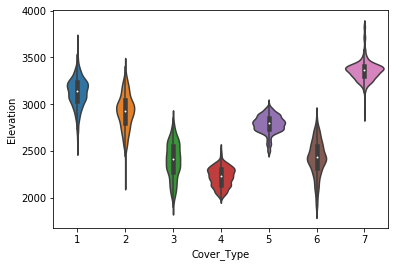

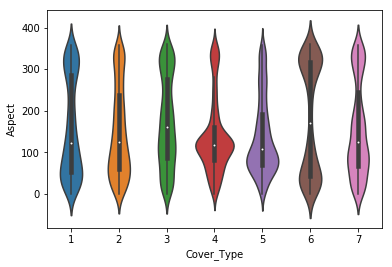

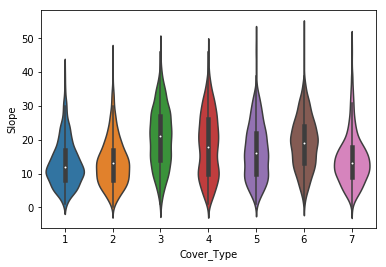

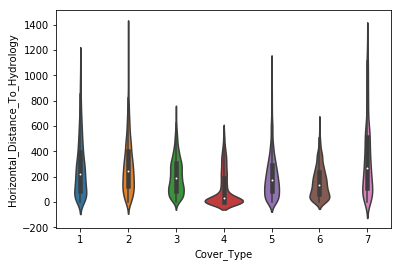

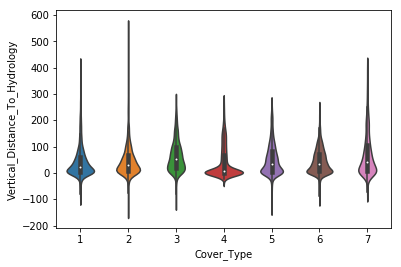

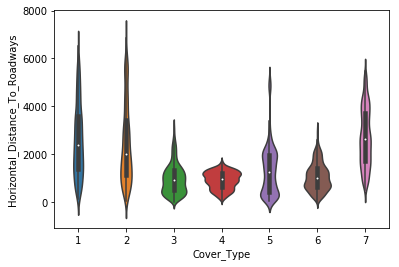

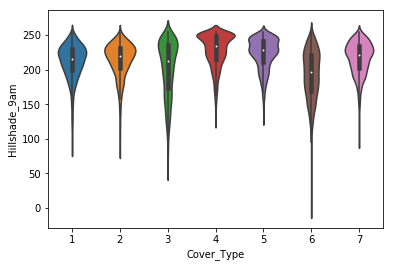

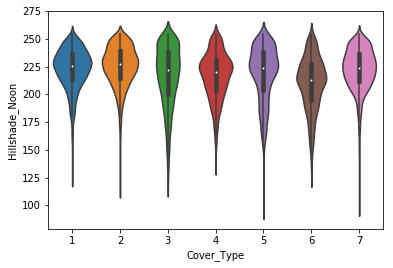

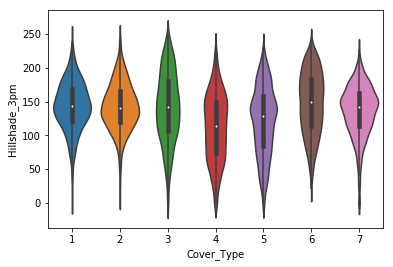

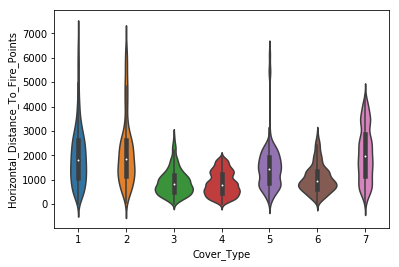

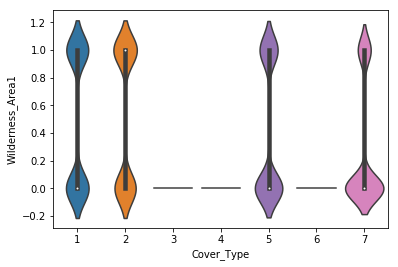

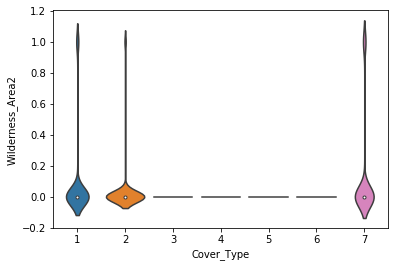

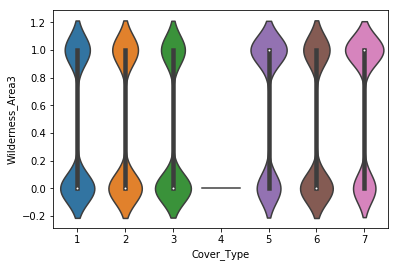

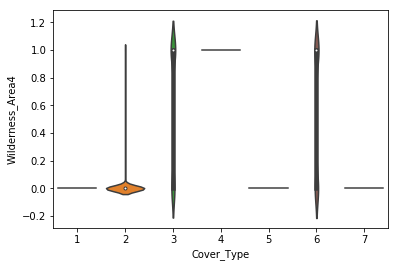

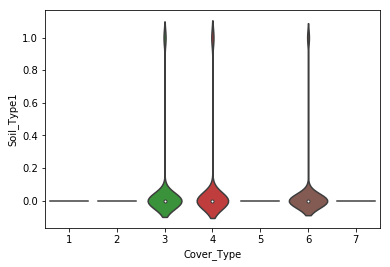

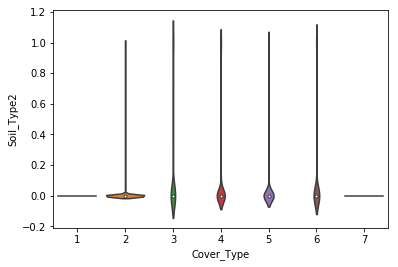

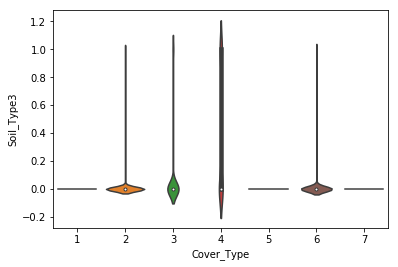

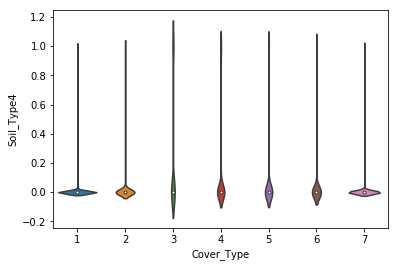

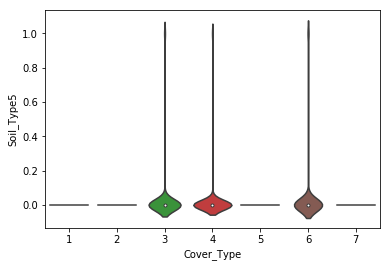

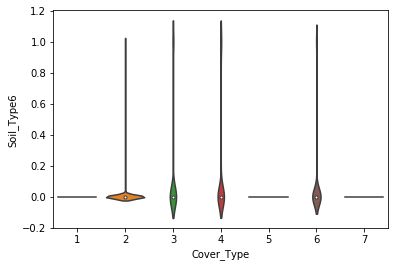

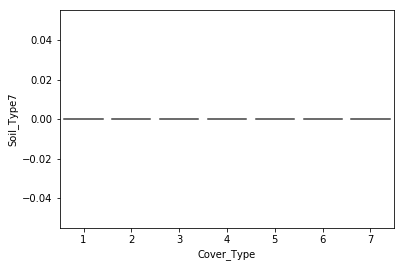

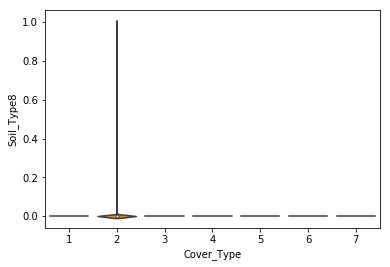

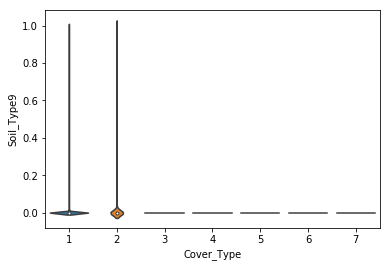

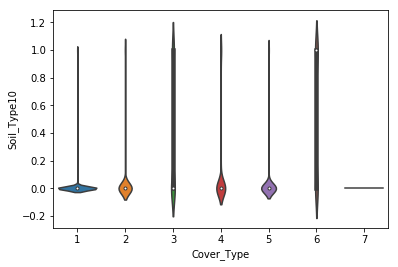

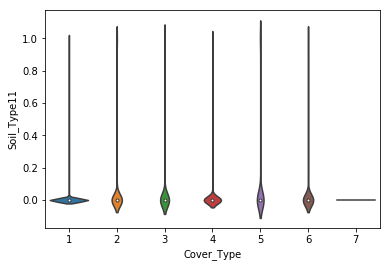

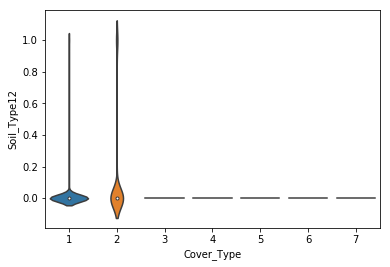

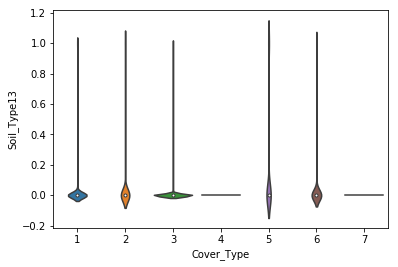

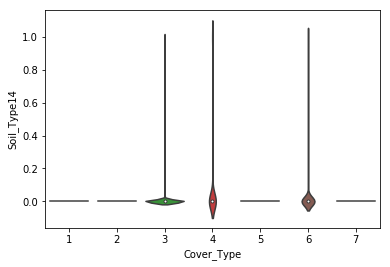

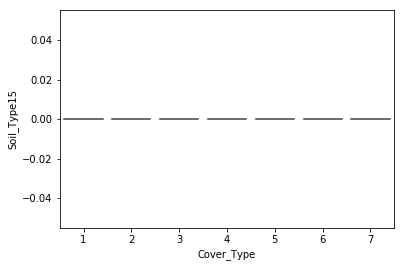

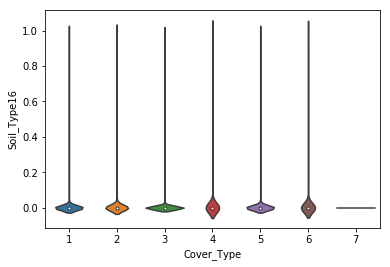

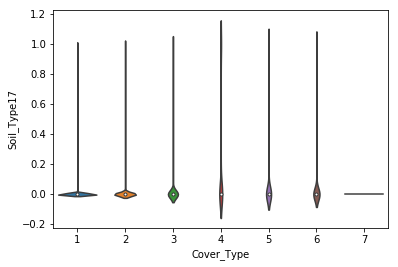

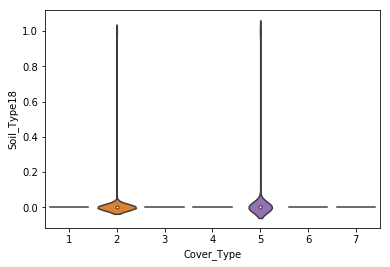

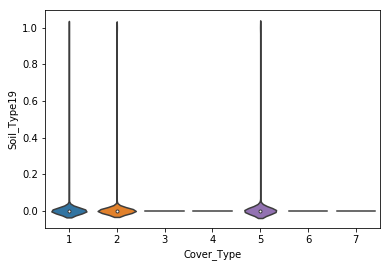

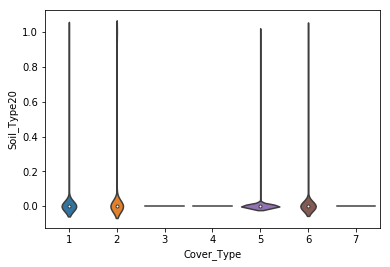

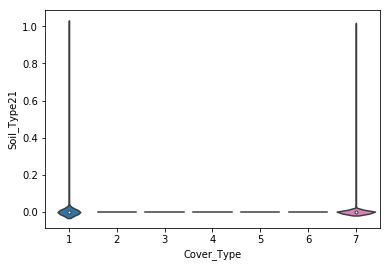

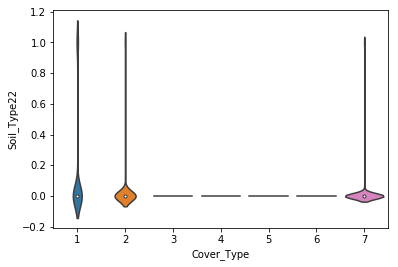

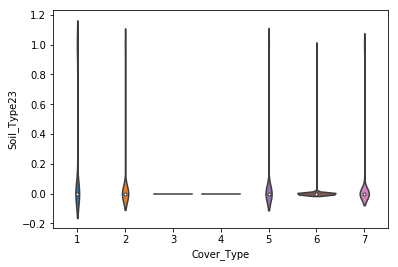

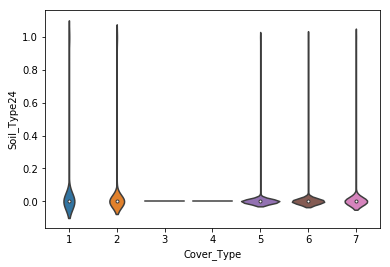

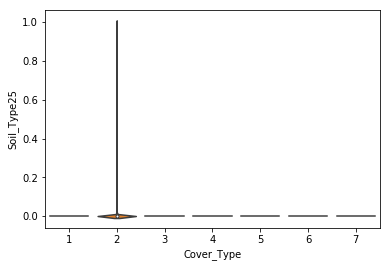

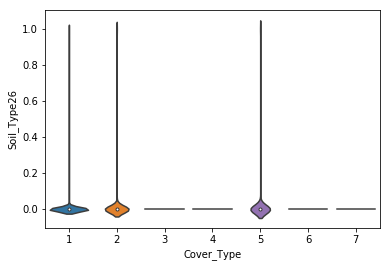

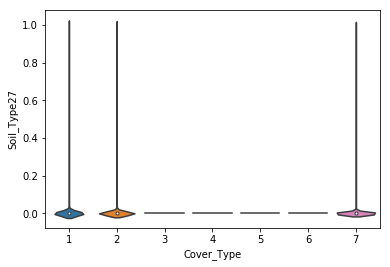

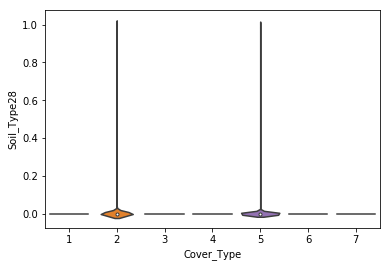

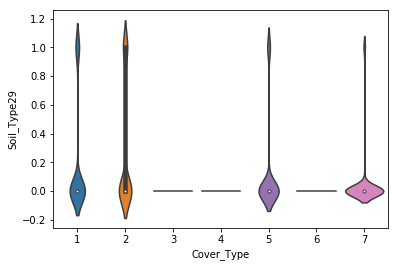

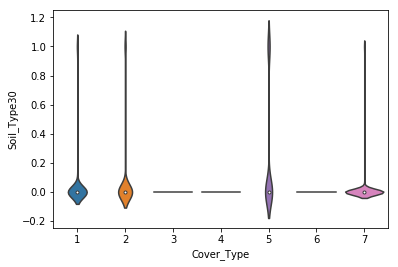

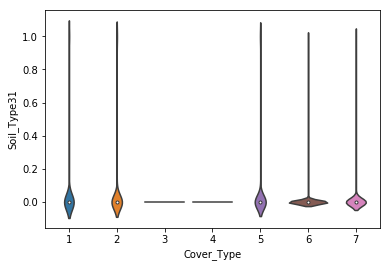

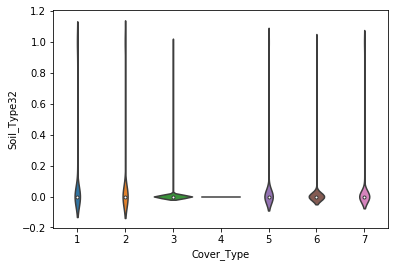

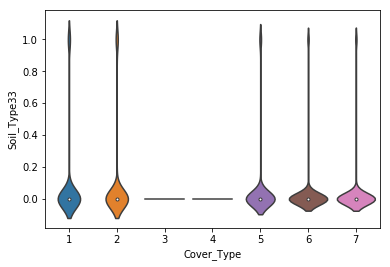

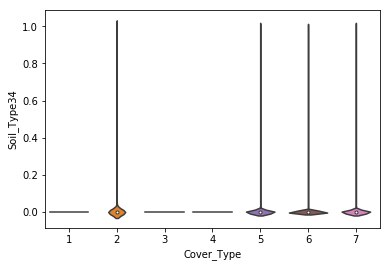

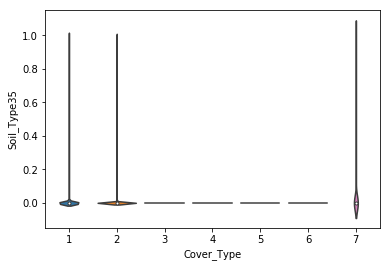

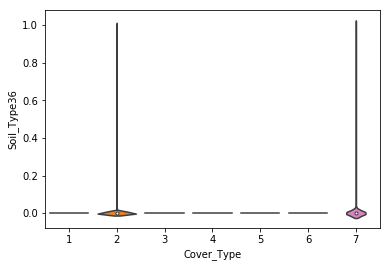

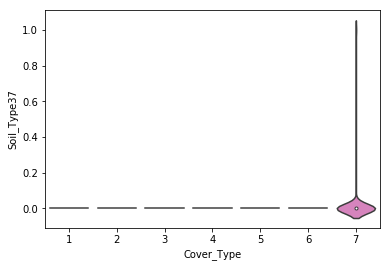

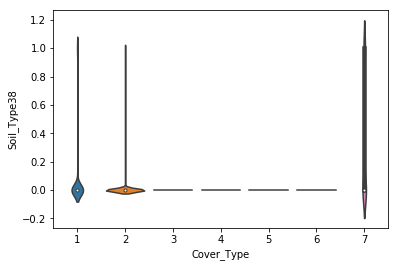

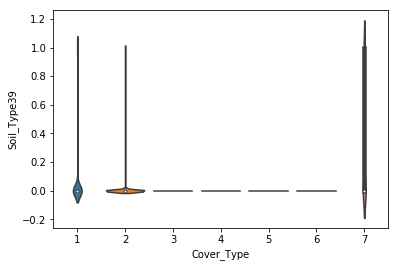

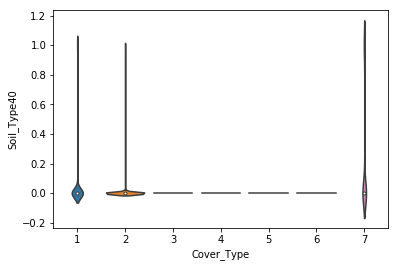

In [7]:

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=dataset,x=x,y=y[i])  
    plt.show()

# Observation
Elevation is has a separate distribution for most classes. Highly correlated with the target and hence an important attribute
Aspect contains a couple of normal distribution for several classes
Horizontal distance to road and hydrology have similar distribution
Lots of 0s in vertical distance to hydrology
Wilderness_Area3 gives no class distinction. As values are not present, others gives some scope to distinguish
Soil_Type, 1,5,8,9,12,14,18-22, 25-30 and 35-40 offer class distinction as values are not present for many classes

In [8]:

threshold = 0.5

# no. of features considered after ignoring categorical variables
num_features = 10

# create a subset of dataframe with only 'num_features'
subset_train = dataset.iloc[:,:num_features]
cols = subset_train.columns
print(cols)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')


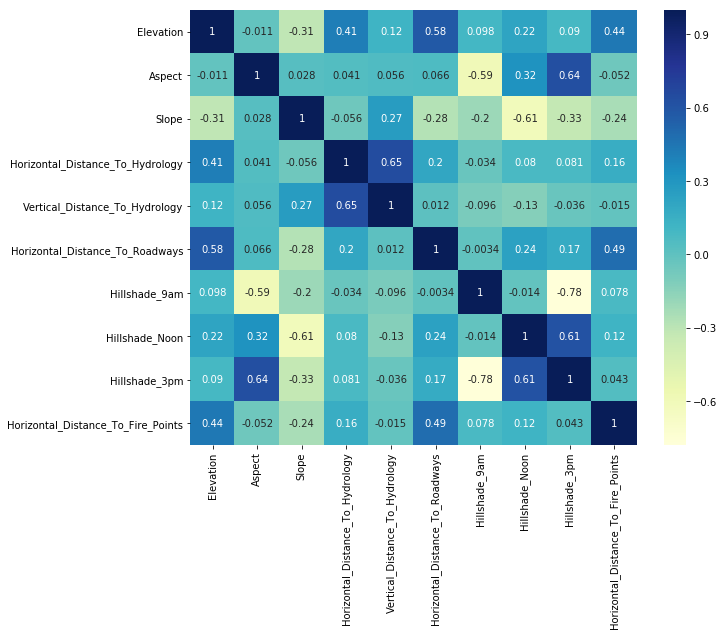

In [9]:
#Calculate the pearson co-efficient for all possible combinations
data_corr = subset_train.corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(data_corr, annot=True, cmap="YlGnBu")

In [10]:
# Set the threshold and search for pairs which are having correlation level above threshold
corr_var_list = []

for i in range(1, num_features):
    for j in range(i):
        if((abs(data_corr.iloc[i,j]) > threshold) & (abs(data_corr.iloc[i,j]) < 1)):
            corr_var_list.append([data_corr.iloc[i,j], i, j])

# Sort the list showing higher ones first 
s_corr_list = sorted(corr_var_list ,key = lambda x:abs(x[0]))

#Print correlations and column names
for corr_value, i, j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],corr_value))

Horizontal_Distance_To_Roadways and Elevation = 0.58
Hillshade_9am and Aspect = -0.59
Hillshade_Noon and Slope = -0.61
Hillshade_3pm and Hillshade_Noon = 0.61
Hillshade_3pm and Aspect = 0.64
Vertical_Distance_To_Hydrology and Horizontal_Distance_To_Hydrology = 0.65
Hillshade_3pm and Hillshade_9am = -0.78


In [11]:
# Identify the unnecessary columns and remove it 
dataset.drop(columns=['Soil_Type7', 'Soil_Type15'], inplace=True)

X = dataset.drop(['Cover_Type'],axis=1)
Y = dataset['Cover_Type'].copy()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [13]:
# Scales are not the same for all variables. Hence, rescaling and standardization may be necessary for some algorithm to be applied on it.
#Standardized
#Apply transform only for non-categorical data
std_model = StandardScaler()
X_train_temp = std_model.fit_transform(X_train.iloc[:,:10])
X_test_temp = std_model.fit_transform(X_test.iloc[:,:10])

#Concatenate non-categorical data and categorical
X_train1 = np.concatenate((X_train_temp, X_train.iloc[:,10:]), axis = 1)
X_test1 = np.concatenate((X_test_temp, X_test.iloc[:,10:]), axis = 1)

print(type(X_train1))

scaled_features_train_df = pd.DataFrame(X_train1, index = X_train.index, columns = X_train.columns)
scaled_features_test_df = pd.DataFrame(X_test1, index = X_test.index, columns = X_test.columns)

<class 'numpy.ndarray'>


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [14]:
scaled_features_train_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
7366,1.477452,1.246418,-0.886308,0.313958,-0.362708,-0.179131,-0.554821,0.834787,1.027495,-0.590132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4936,-1.271547,-0.424954,1.127206,-0.655707,-0.444100,-0.715014,1.320721,-0.745848,-1.637121,0.016264,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5777,1.489446,0.982995,-1.241633,-0.939512,-0.769668,1.956064,-0.258683,1.054319,0.896448,2.441847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10724,-0.470355,-0.325035,-0.767866,-1.081414,-0.834782,-0.746849,0.794253,0.571347,-0.217449,-0.333755,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9412,1.623778,-1.396892,0.298112,1.926913,0.467490,1.859044,-0.719342,-0.833661,0.175691,1.851816,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
scaled_features_test_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
4428,-1.241420,-1.256233,-0.538581,-1.083018,-0.831380,-0.677515,-0.034425,-0.169380,0.094207,-1.062379,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12399,-1.433948,-0.338492,-0.773989,-1.083018,-0.831380,-0.599579,0.798390,0.572883,-0.229621,-0.792305,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4647,-1.070284,-0.429357,1.109275,-0.144146,0.789816,-0.641887,1.310891,-0.780655,-1.676050,-0.082108,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5953,-0.944309,-0.583829,-0.420877,-1.083018,-0.831380,-0.951402,0.894484,0.048933,-0.575037,-0.889604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2946,-1.887934,1.733240,-0.420877,-1.083018,-0.831380,-1.158488,-0.578958,-0.038392,0.569154,-0.874145,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:

# Write your solution here:
skb = SelectPercentile(score_func=f_classif,percentile=20)
predictors = skb.fit_transform(X_train1, Y_train)
scores = list(skb.scores_)
scores

[13023.207161059043,
 39.93804878679793,
 245.77338365524932,
 311.63976262801697,
 64.99304235667877,
 957.6194491637209,
 296.3279790605302,
 93.9837175516788,
 154.4884049482673,
 589.1073798669238,
 732.9574360701494,
 132.6879875816822,
 354.44060959294313,
 4079.85662644044,
 68.1013502927906,
 114.68876198760793,
 739.4045753044655,
 204.09878923788438,
 32.88349298779064,
 135.59685570487974,
 0.985985140425036,
 6.851187978391767,
 765.5916246751356,
 43.84329270209906,
 159.01554903261416,
 160.90927967164032,
 75.77164546264333,
 16.58853658189582,
 168.26681617890853,
 26.187539656586228,
 9.507330218530909,
 23.308304963286876,
 7.388530253265676,
 174.27724668375848,
 155.95819676102587,
 50.54890069095533,
 0.985985140425036,
 10.859615537343078,
 3.2343180287023903,
 3.5848567850370077,
 267.91306904375756,
 294.69886261558895,
 46.3393598383929,
 95.72533013546699,
 61.529165023580155,
 5.670730270051452,
 73.42683979384333,
 5.921062393534824,
 24.109510828533832,
 65

In [21]:
top_k_index = skb.get_support(True)
top_k_predictors = scaled_features_train_df.columns[top_k_index]
# or
#top_k_index = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:predictors.shape[1]]
#top_k_predictors = [scaled_features_train_df.columns[i] for i in top_k_index]

print("top_k_index: ", top_k_index)
print("top_k_predictors: ",top_k_predictors)

top_k_index:  [ 0  5  9 10 12 13 16 22 49 50 51]
top_k_predictors:  Index(['Elevation', 'Horizontal_Distance_To_Roadways',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type3', 'Soil_Type10',
       'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')


In [27]:
clf1 = OneVsRestClassifier(LogisticRegression()) 
model_fit_all_features = clf1.fit(X_train, Y_train)
predictions_all_features = model_fit_all_features.predict(X_test)
score_all_features = accuracy_score(Y_test, predictions_all_features)
score_all_features

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

0.673941798941799

In [28]:
clf = OneVsRestClassifier(LogisticRegression())
model_fit_top_features = clf.fit(scaled_features_train_df [top_k_predictors], Y_train)
predictions_top_features = model_fit_top_features.predict(scaled_features_test_df [top_k_predictors])
score_top_features = accuracy_score(Y_test, predictions_top_features)
score_top_features


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

0.6011904761904762